In [17]:
%matplotlib inline
import os
import sys
from ray.tune import Analysis

import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt


# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TRAIN_RESULTS_PATH
%matplotlib inline

In [18]:
series = 1
total_timesteps = 100000


evaluation_infos = {
    # 0 : {
    #     'cluster_id': 0,
    #     'legend': 'PG',
    #     'experiment_id': 4,
    #     'algorithm': 'PG',
    #     'workload_id': 0,
    #     'trial': 'PG_SimSchedulerEnv_92f3d_00000_0_target_utilization=[0, 0]_2022-11-16_15-30-17'},
    # 1: {
    #     'cluster_id': 0,
    #     'legend': 'DQN',
    #     'experiment_id': 3,
    #     'algorithm': 'DQN',
    #     'workload_id': 0,
    #     'trial': 'DQN_SimSchedulerEnv_70a79_00000_0_target_utilization=[0, 0]_2022-11-15_16-06-18'},
    2: {
        'cluster_id': 0,
        'legend': 'PG',
        'experiment_id': 0,
        'algorithm': 'PG',
        'workload_id': 0,
        'trial': 'PG_SimSchedulerEnv_caf24_00000_0_episode_length=10_2022-11-14_00-17-58'},
}

In [19]:
def load_experiments(cluster_id, legend, experiment_id, workload_id, algorithm, trial):
    experiment_folder_path = os.path.join(
        TRAIN_RESULTS_PATH,
        "series",      str(series),
        "envs",        'sim-scheduler',
        "clusters",    str(cluster_id),
        "workloads",   str(workload_id),
        "experiments", str(experiment_id),
        str(algorithm), trial)
    analysis = Analysis(experiment_folder_path)
    df = analysis.trial_dataframes[experiment_folder_path]
    with open(
        os.path.join(
            experiment_folder_path, 'result.json'), 'r') as f:
        result = f.read().split('\n')
    # episodes_reward = pd.DataFrame({'timestep':[], 'reward':[]})
    experiment_json = {}
    # TODO also load the df and do from scrath with the goal of replicating the tensorboard results
    for line, iteration in enumerate(result):
        if iteration != '':
            experiment_json[line] = json.loads(iteration)
    # replace rewards with new ones
    selected_stats = [
        'episode_reward_mean', 'episodes_this_iter',
        'timesteps_total',
        'custom_metrics/scheduling_timestep_avg_mean',
        'custom_metrics/scheduling_success_avg_mean',
        'custom_metrics/num_consolidated_avg_mean',
        'custom_metrics/num_overloaded_avg_mean',
        'custom_metrics/time_mean',
        'custom_metrics/timestep_episode_mean',
        'custom_metrics/reward_u_mean',
        'custom_metrics/reward_c_mean',
        'custom_metrics/reward_v_mean',
        'custom_metrics/reward_g_mean',
        'custom_metrics/reward_p_mean']
    experiment_df = df[selected_stats]
    return legend, cluster_id, experiment_df, experiment_json


experiments_df = {}
experiments_json = {}
# episodes_rewards = []
for evaluation_id, evaluation_info in evaluation_infos.items():
    legend, cluster_id, experiment_df, experiment_json = load_experiments(**evaluation_info)
    experiments_json[evaluation_id] = experiment_json
    experiments_df[evaluation_id] = experiment_df

<AxesSubplot:>

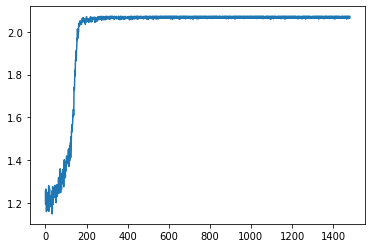

In [20]:
experiment_id = 2
metric = 'custom_metrics/num_consolidated_avg_mean'
metric = experiments_df[experiment_id][metric]
metric.plot()
